In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import csv
#importing all the libraries
file_obj=open('zomato.csv',encoding='utf-8')
df=pd.read_csv(file_obj)
df1=df[df['Country Code']==1]
#slicing for India

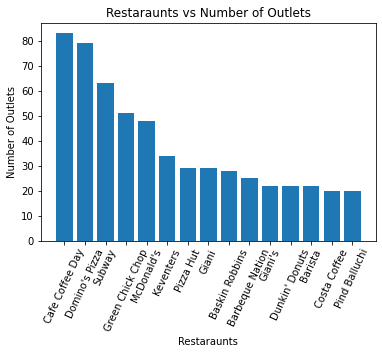

In [11]:
#Q3 Part 1
df2=df1
d=df2['Restaurant Name'].value_counts()
#No of values of each restaurant(no of outlets)
d=d[0:15]#slicing for Top 15
y=list(d.values)
x=list(d.index)
plt.bar(x,y)
plt.xticks(rotation=65)
plt.xlabel("Restaraunts")
plt.ylabel("Number of Outlets")
plt.title("Restaraunts vs Number of Outlets")
plt.show()


<ipython-input-18-f7b2429cc601>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Aggregate rating'] = df1['Aggregate rating'].replace(0,np.nan)


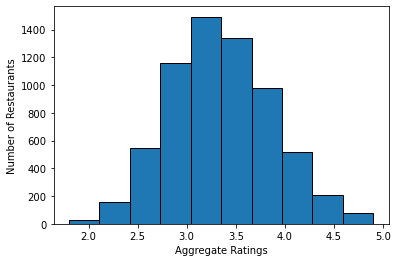

In [18]:
#Q3 part2
df3=df1
df3['Aggregate rating'] = df1['Aggregate rating'].replace(0,np.nan)
#replacing 0 with  nan
df3['Aggregate rating'].dropna(inplace=True)
#dropping unrated /nan values
k=list(df3['Aggregate rating'].values)
k
plt.xlabel("Aggregate Ratings")
plt.ylabel("Number of Restaurants")

plt.hist(k,edgecolor='black')
#plotting histogram of aggregate rating of number of restaurants
plt.show()


                Restaurant Name  Votes
728                        Toit  10934
735                    Truffles   9667
3994           Hauz Khas Social   7931
2412                  Peter Cat   7574
739   AB's - Absolute Barbecues   6907
2414            Barbeque Nation   5966
743                 Big Brewsky   5705
2307  AB's - Absolute Barbecues   5434
736             The Black Pearl   5385
2411                      BarBQ   5288
3110            Saravana Bhavan   5172


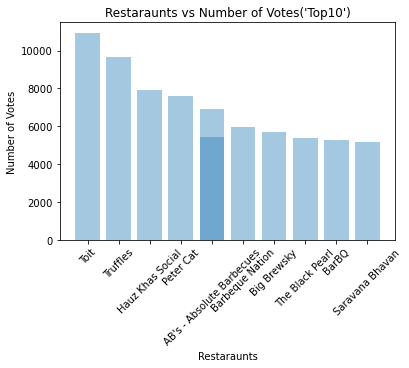

In [23]:
#q3 p3
df4=df1
df4=df4[['Restaurant Name','Votes']]
#getting required columns
df4 = df4.sort_values(by ='Votes' , ascending=False)
print(df4[0:11])
#sorting to find restaurants with highest no of votes
df4=df4[0:11]
#slicing to get top 10
x=list(df4['Restaurant Name'])
y=list(df4['Votes'])
plt.bar(x,y,alpha=0.4)
plt.xticks(rotation=45)
plt.xlabel("Restaraunts")
plt.ylabel("Number of Votes")
plt.title("Restaraunts vs Number of Votes('Top10')")
plt.show()
#plotted 11 values as there are 2 for Absolute Barbequess'

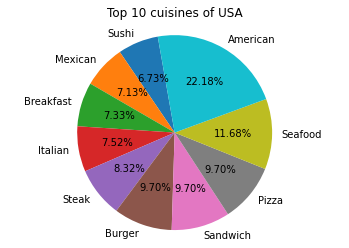

In [14]:
#Q3 p4
df5=df[df['Country Code']==216]
#slicing df to get american values
k=df5['Cuisines']
k
d={}
x=[]
y=[]
k.dropna(inplace=True)
for i in k:
    x.append(i.split(","))
#splitting the values by comma and appending into list x    
    
for i in x:
    for j in i:
        y.append(j.strip())
#striping the values of extra space and appending into list y
for i in y:
        if i in d:
            d[i]+=1
        else:
            d[i]=1  
d  
#using dictionaries to keep count of values
sort_orders = sorted(d.items(), key=lambda x: x[1])
#sorting dictionaries to list of top 10 cuisines
sort_orders=sort_orders[-10:]
sort_orders
a=[]
b=[]
for i in sort_orders:
     a.append(i[0])
#appending the index to get labels in a list         
for i in sort_orders:
     b.append(i[1])
#appending the values to get labels in a list        
plt.title('Top 10 cuisines of USA')
plt.pie(b, labels=a, autopct="%.2f%%",  startangle=100)
plt.axis("equal")
plt.show()      
#plotting pie graph

In [15]:
#Q# part5
df6=df1
df6['multiply']=df6['Aggregate rating']*df6['Votes']
#multiplying to get votes * rating to find the weight
df7=df6.groupby('City')['Votes'].sum()
#getting sum of votes for each city using groupby
df8=df6.groupby('City')['multiply'].sum()
#getting sum of votes*rating for each city using groupby
df9=df8/df7
#divinding to get the weighted values for city
x=list(df9.index)#list of index
y=list(df9.values)#list of weights
z=df6['City'].value_counts()
#finding the number of restaurants for each city

<ipython-input-15-430eadcc7b24>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6['multiply']=df6['Aggregate rating']*df6['Votes']


In [16]:
z=pd.DataFrame(z)
#making a dataframe 
z=z.sort_index()
#sorting z 
z
k=[]
for i in z['City']:
    k.append(i)
#appending z in k for plotting

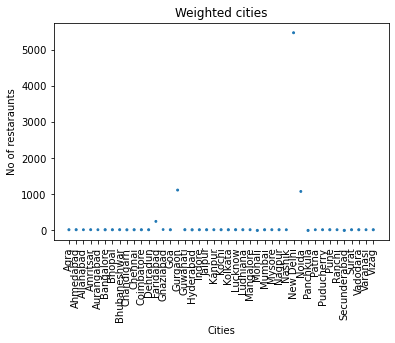

In [17]:
plt.scatter(x,k,s=y)
plt.title('Buble Chart')
plt.xlabel("Cities")
plt.ylabel('No of restaraunts')
plt.title('Weighted cities')
plt.xticks(rotation=90)
plt.show()